In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [4]:
sns.set(style='whitegrid')

In [8]:
from google.colab import files
uploaded = files.upload()

Saving COVID-19 Survey Student Responses.csv to COVID-19 Survey Student Responses.csv


In [9]:
df = pd.read_csv(next(iter(uploaded)))
df.head()

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling


In [10]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum())
df.describe(include='all')

Shape: (1182, 19)
Columns: ['ID', 'Region of residence', 'Age of Subject', 'Time spent on Online Class', 'Rating of Online Class experience', 'Medium for online class', 'Time spent on self study', 'Time spent on fitness', 'Time spent on sleep', 'Time spent on social media', 'Prefered social media platform', 'Time spent on TV', 'Number of meals per day', 'Change in your weight', 'Health issue during lockdown', 'Stress busters', 'Time utilized', 'Do you find yourself more connected with your family, close friends , relatives  ?', 'What you miss the most']

Missing Values:
 ID                                                                                     0
Region of residence                                                                    0
Age of Subject                                                                         0
Time spent on Online Class                                                             0
Rating of Online Class experience                                 

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
count,1182,1182,1182.000000,1182.000000,1158,1131,1182.000000,1182.000000,1182.000000,1182.000000,1165,1182,1182.000000,1182,1182,1182,1182,1182,1182
unique,1182,2,NaN,NaN,5,5,NaN,NaN,NaN,NaN,15,25,NaN,3,2,86,2,2,51
top,R1195,Delhi-NCR,NaN,NaN,Very poor,Laptop/Desktop,NaN,NaN,NaN,NaN,Instagram,0,NaN,Remain Constant,NO,Listening to music,NO,YES,School/college
freq,1,721,NaN,NaN,413,545,NaN,NaN,NaN,NaN,352,441,NaN,535,1021,276,608,831,379
mean,NaN,NaN,20.165821,3.208841,NaN,NaN,2.911591,0.765821,7.871235,2.365694,NaN,NaN,2.917936,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,5.516467,2.101756,NaN,NaN,2.140590,0.724451,1.615762,1.767336,NaN,NaN,0.828698,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,7.000000,0.000000,NaN,NaN,0.000000,0.000000,4.000000,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,17.000000,2.000000,NaN,NaN,2.000000,0.000000,7.000000,1.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,20.000000,3.000000,NaN,NaN,2.000000,1.000000,8.000000,2.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,21.000000,5.000000,NaN,NaN,4.000000,1.000000,9.000000,3.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df = df.dropna()

In [12]:
label_enc = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = label_enc.fit_transform(df[col])


In [13]:
if 'Stress_Level' in df.columns and 'Screen_Time' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Stress_Level', y='Screen_Time', data=df)
    plt.title("Screen Time vs Stress Level")
    plt.show()


In [14]:
target_col = 'Stress_Level'

In [15]:
X = df.drop('Stress busters', axis=1)
y = df['Stress busters']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
y_pred = model.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.2242152466367713

📋 Classification Report:
               precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         6
          11       0.00      0.00      0.00         1
          12       0.33      0.14      0.20         7
          13       0.00      0.00      0.00         1
          19       1.00      1.00      1.00         1
          25       0.00      0.00      0.00         1
          29       0.24      0.75      0.36        48
          33       1.00      0.09      0.17        11
          34       0.00      0.00      0.00         1
          36       0.27      0.25      0.26        40
          37       0.00      0.00      0.00         1
          38       0.00      0.00      0.00         7
          42       0.00      0.00      0.00         4
          43       0.00      0.00      0.00        18
          46       0.00

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [20]:
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)


/tmp/ipython-input-27-658525275.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Stress busters', data=df, palette='coolwarm')


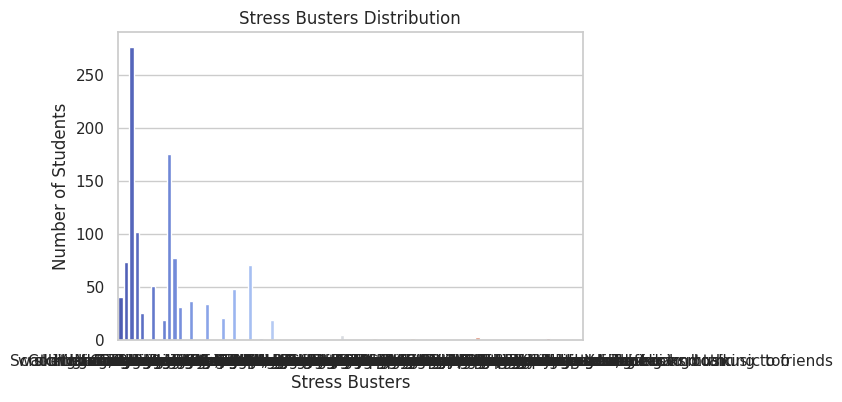

In [27]:
plt.figure(figsize=(6,4))
sns.countplot(x='Stress busters', data=df, palette='coolwarm')
plt.title("Stress Busters Distribution")
plt.xlabel("Stress Busters")
plt.ylabel("Number of Students")
plt.show()

/tmp/ipython-input-29-3913003490.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


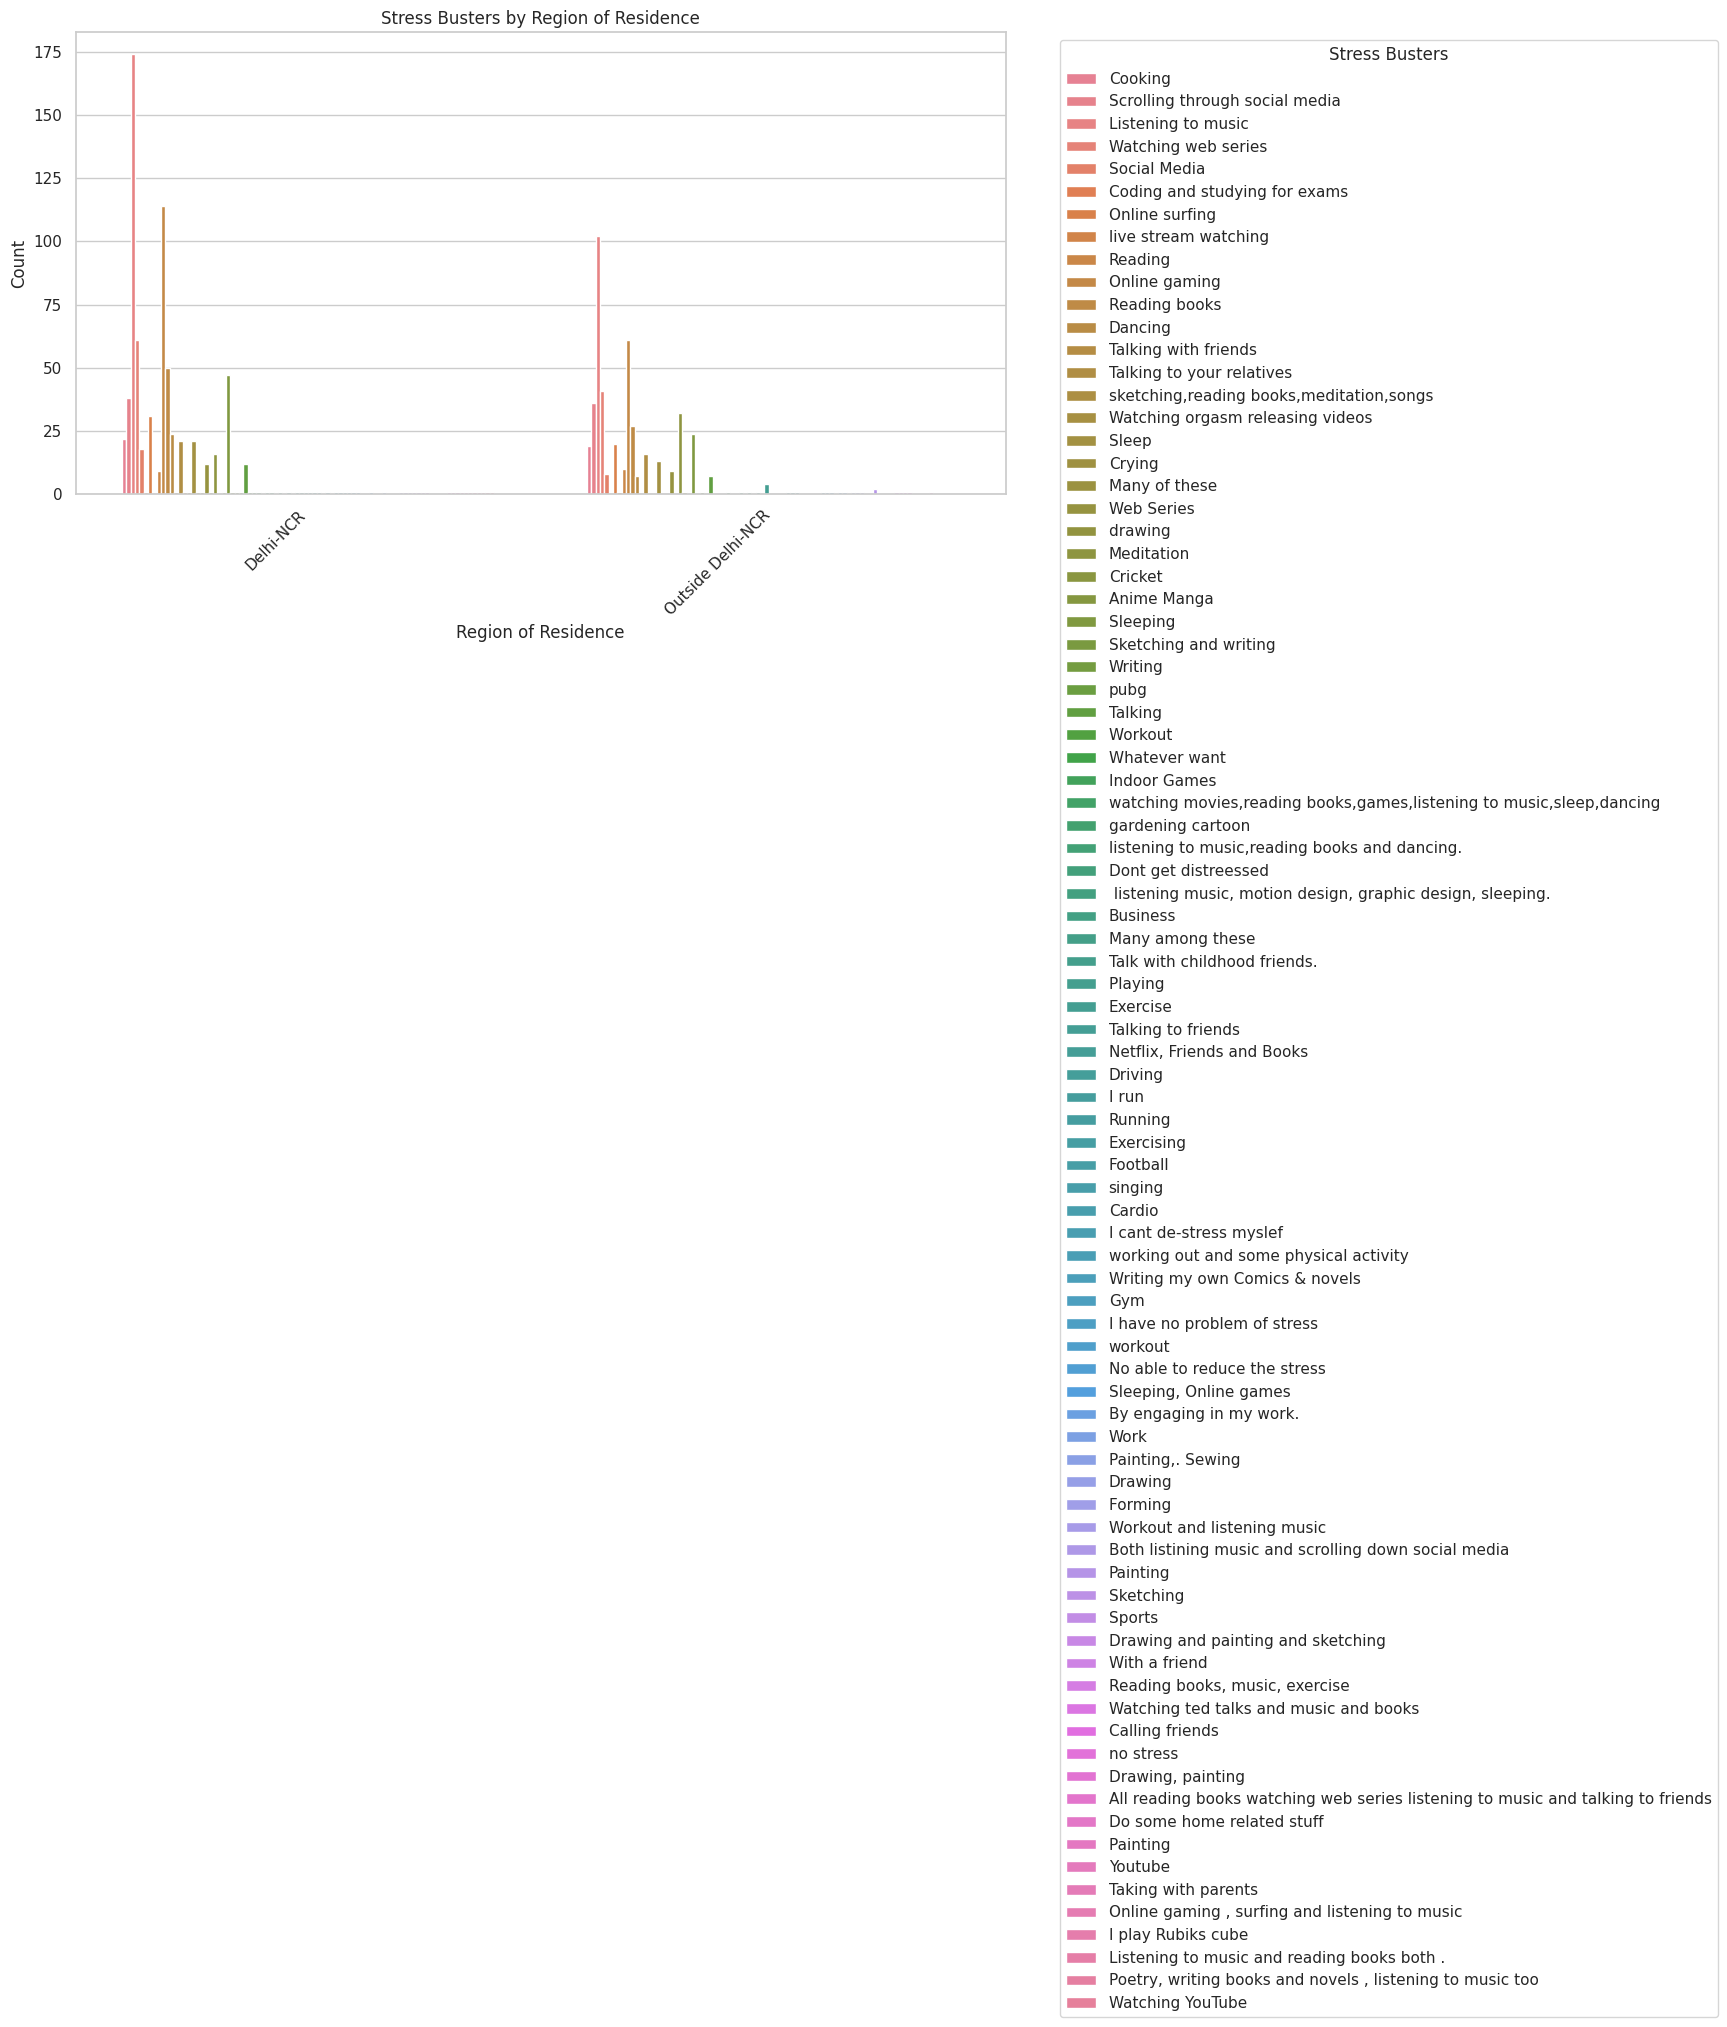

In [29]:
plt.figure(figsize=(12,6))
sns.countplot(x='Region of residence', hue='Stress busters', data=df)
plt.title("Stress Busters by Region of Residence")
plt.xlabel("Region of Residence")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Stress Busters", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

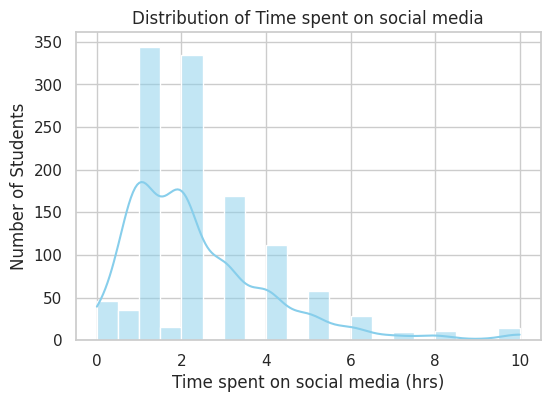

In [31]:
plt.figure(figsize=(6,4))
sns.histplot(df['Time spent on social media'], kde=True, bins=20, color='skyblue')
plt.title("Distribution of Time spent on social media")
plt.xlabel("Time spent on social media (hrs)")
plt.ylabel("Number of Students")
plt.show()

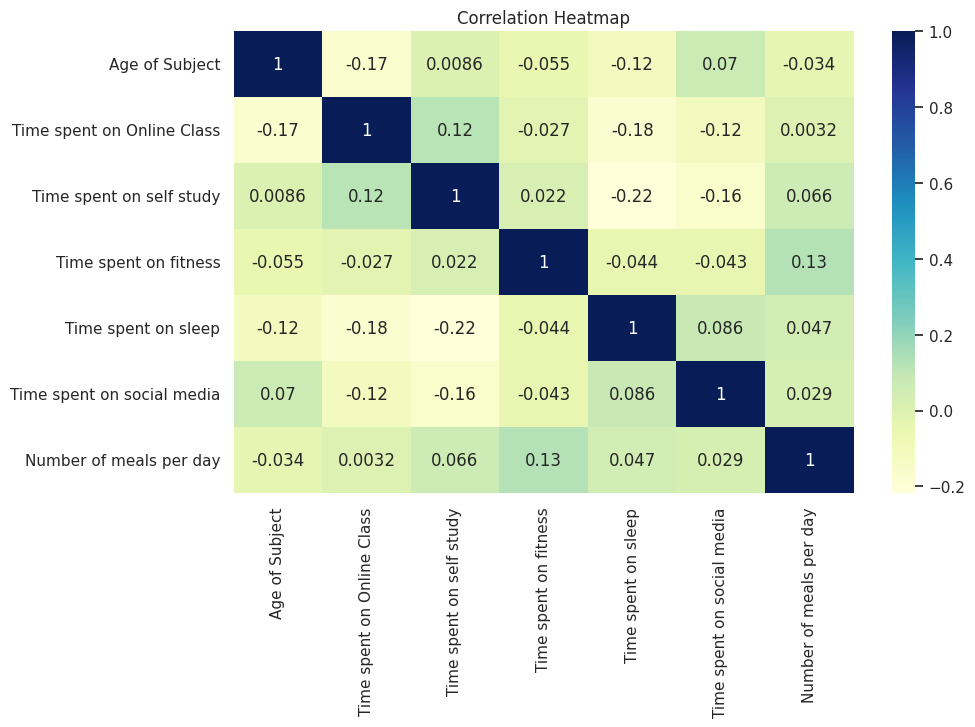

In [32]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlGnBu')
plt.title("Correlation Heatmap")
plt.show()
